# Bike Sharing Assignment

## Background and Problem Statement

### Background:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. The company is finding it very difficult to sustain in the current market scenario. 

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Steps:-
1. Reading and understanding the data
2. Data Visualization
3. Data Preparation
4. Model Building with training data
6. Model Evaluation
7. Residual Analysis
8. Predictions on test data

## Importing the needed libraries

In [1]:
# Numerical Operations and Data Handling
import numpy as np
import pandas as pd

In [2]:
# Plotting Graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Model Building
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.linear_model import LinearRegression     # For the linear regression model
from sklearn.feature_selection import RFE

# scaling
from sklearn.preprocessing import MinMaxScaler

# Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Ignore warnings to appear
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', 15)

## Reading and Understanding the Data

In [6]:
# read the bike sharing dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,...,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,...,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,...,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,...,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,...,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,...,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# check the number of records and features in the dataset
bike.shape

(730, 16)

In [8]:
# check any missing values and data types of the dataset features
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# No null values

# dteday might not be relevant as there are other more relevant columns such as season, weekday etc available
    # bike rental is not exactly dependent ona particular date, rather more on days or seasons

# season, yr, mnth, holiday, weekday, workingday, weathersit are all categorical type
    # These can all be decoded into categories and the data types can be accordingly set to object rather than integer

# temp, atemp, hum, windspeed are all given as float types which seems fine
    # temp and atemp might be highly correlated, as these are about actual and perceived/felt temperature

# casual, registered, cnt are given as integers which seems fine too.
    # cnt contains casual and registered variables, so probably casual and registered can be dropped


In [10]:
# check statistical information of the numerical features
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# cnt doesn't seem to be exactly a sum of casual and registered
# categorical variables mostly seem fine in terms of number of distinct/unique values

In [12]:
# check distinct values in categorical columns season, yr, mnth, holiday, weekday, workingday, weathersit
print(bike.season.value_counts())
print(bike.yr.value_counts())
print(bike.mnth.value_counts())
print(bike.holiday.value_counts())
print(bike.weekday.value_counts())
print(bike.workingday.value_counts())
print(bike.weathersit.value_counts())

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64
workingday
1    504
0    226
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64


In [13]:
# weathersit is supposed to have 4 distinct values as per data dictionary
    # But the value 4 is not existent in the value counts

# information, whether a day is a holiday or a weekend day, is contained in workingday variable
# information, whether a day is a holiday is contained in holiday variable
    # probably this combination can be used to extract info on whether a day is a weekend day (Saturday/Sunday)


In [14]:
# dteday and instant are irrelevant column for this analysis and model building
bike.drop(labels=['dteday','instant'], axis=1, inplace=True)

In [15]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# Description of categorical variables from the data dictionary:

# season: 1:spring, 2:summer, 3:fall, 4:winter
# year: (0:2018, 1:2019)
# month: 1 to 12 (Jan to Dec)
# holiday: weather day is a holiday or not (1:holiday, 0:no holiday)
# weekday: day of the week (0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat)
# workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
# weathersit: 
    # 1: Clear, Few clouds, Partly cloudy, Partly cloudy -> Clear
    # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -> Mist
    # 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -> LightRain
    # 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -> HeavyRain

In [17]:
# Create a list of distinct values in the categorical columns
# It is useful in visualizing the categorical variables

seasonTypes = ['Spring', 'Summer', 'Fall', 'Winter']
yearCategories = ['2018', '2019']
monthCategories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
holidayCategories = ['No_Holiday', 'Holiday']
weekdayCategories = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
workingdayCategories = ['Weekend_Holiday', 'Weekday']
weatherTypes = ['Clear', 'Misty', 'LoRain', 'HiRain']

In [18]:
# Convert the numeric values in categorical columns to corresponding categories from the data dictionary

#     season:['Spring', 'Summer', 'Fall', 'Winter']
#         yr:['2018', '2019']
#       mnth:['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#    holiday:['No_Holiday', 'Holiday']
#    weekday:['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
# workingday:['Weekend_Holiday', 'Weekday']
# weathersit:['Clear', 'Misty', 'LoRain', 'HiRain']

bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike.season = bike.season.astype(dtype='object')

bike.yr = bike.yr.map({0: '2018', 1: '2019'})
bike.yr = bike.yr.astype(dtype='object')

bike.mnth = bike.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul' ,8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike.mnth = bike.mnth.astype(dtype='object')

bike.holiday = bike.holiday.map({0:'No_Holiday', 1:'Holiday'})
bike.holiday = bike.holiday.astype(dtype='object')

bike.weekday = bike.weekday.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
bike.weekday = bike.weekday.astype(dtype='object')

bike.workingday = bike.workingday.map({0:'Weekend_Holiday', 1:'Weekday'})
bike.workingday = bike.workingday.astype(dtype='object')

bike.weathersit = bike.weathersit.map({1:'Clear', 2:'Misty', 3:'LoRain', 4:'HiRain'})
bike.weathersit = bike.weathersit.astype(dtype='object')


In [19]:
# check distinct values in categorical columns season, yr, mnth, holiday, weekday, workingday, weathersit
print(bike.season.value_counts())
print(bike.yr.value_counts())
print(bike.mnth.value_counts())
print(bike.holiday.value_counts())
print(bike.weekday.value_counts())
print(bike.workingday.value_counts())
print(bike.weathersit.value_counts())

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64
yr
2018    365
2019    365
Name: count, dtype: int64
mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64
holiday
No_Holiday    709
Holiday        21
Name: count, dtype: int64
weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64
workingday
Weekday            504
Weekend_Holiday    226
Name: count, dtype: int64
weathersit
Clear     463
Misty     246
LoRain     21
Name: count, dtype: int64


## Data Visualization:
    1. Distplots for al numerical variables to see distribution
    2. Pairplots for all numerical variables
    3. Boxplots for all categorical variables (Boxplots with hue, if needed)

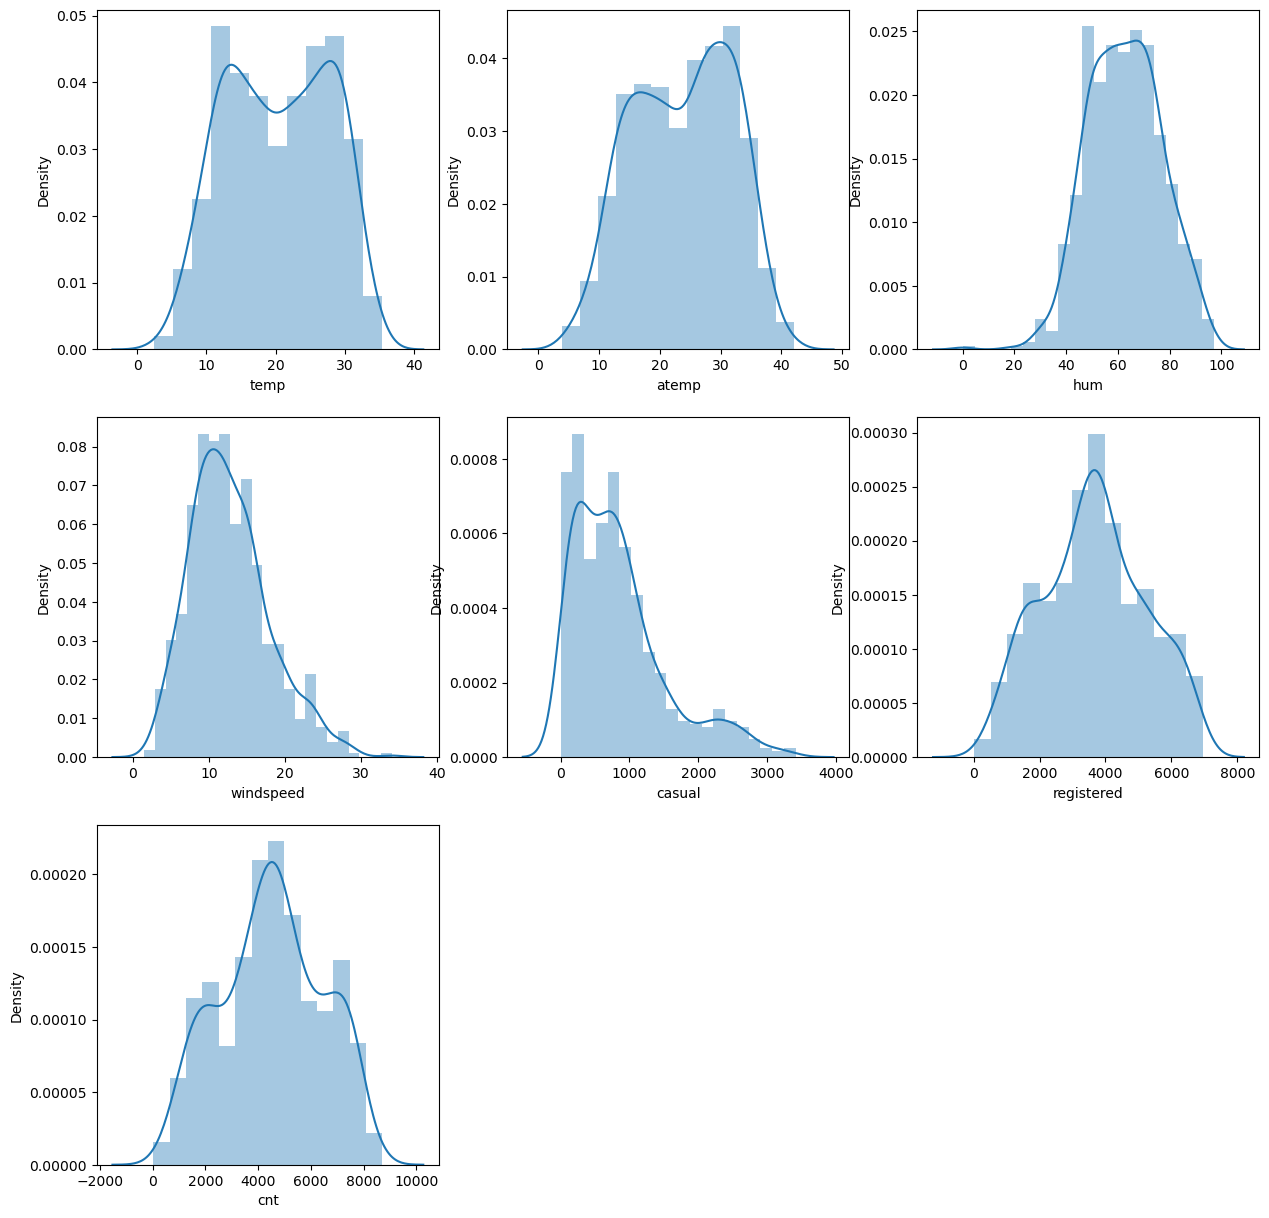

In [20]:
# plot distribution for all numeric variables
# temperature, humidity, wind speed, casual users, registered users and total user count

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.distplot(bike.temp)
plt.subplot(3,3,2)
sns.distplot(bike.atemp)
plt.subplot(3,3,3)
sns.distplot(bike.hum)
plt.subplot(3,3,4)
sns.distplot(bike.windspeed)
plt.subplot(3,3,5)
sns.distplot(bike.casual)
plt.subplot(3,3,6)
sns.distplot(bike.registered)
plt.subplot(3,3,7)
sns.distplot(bike.cnt)
plt.show()

In [21]:
bike.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [22]:
# Separate out the list of numerical and categorical columns

numCols=[]
catCols=[]
for i in bike.columns:
    if (bike[i].dtype != 'int64') and (bike[i].dtype != 'float64'):
        catCols.append(i)
    else:
        numCols.append(i)

print(numCols)
print(catCols)

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


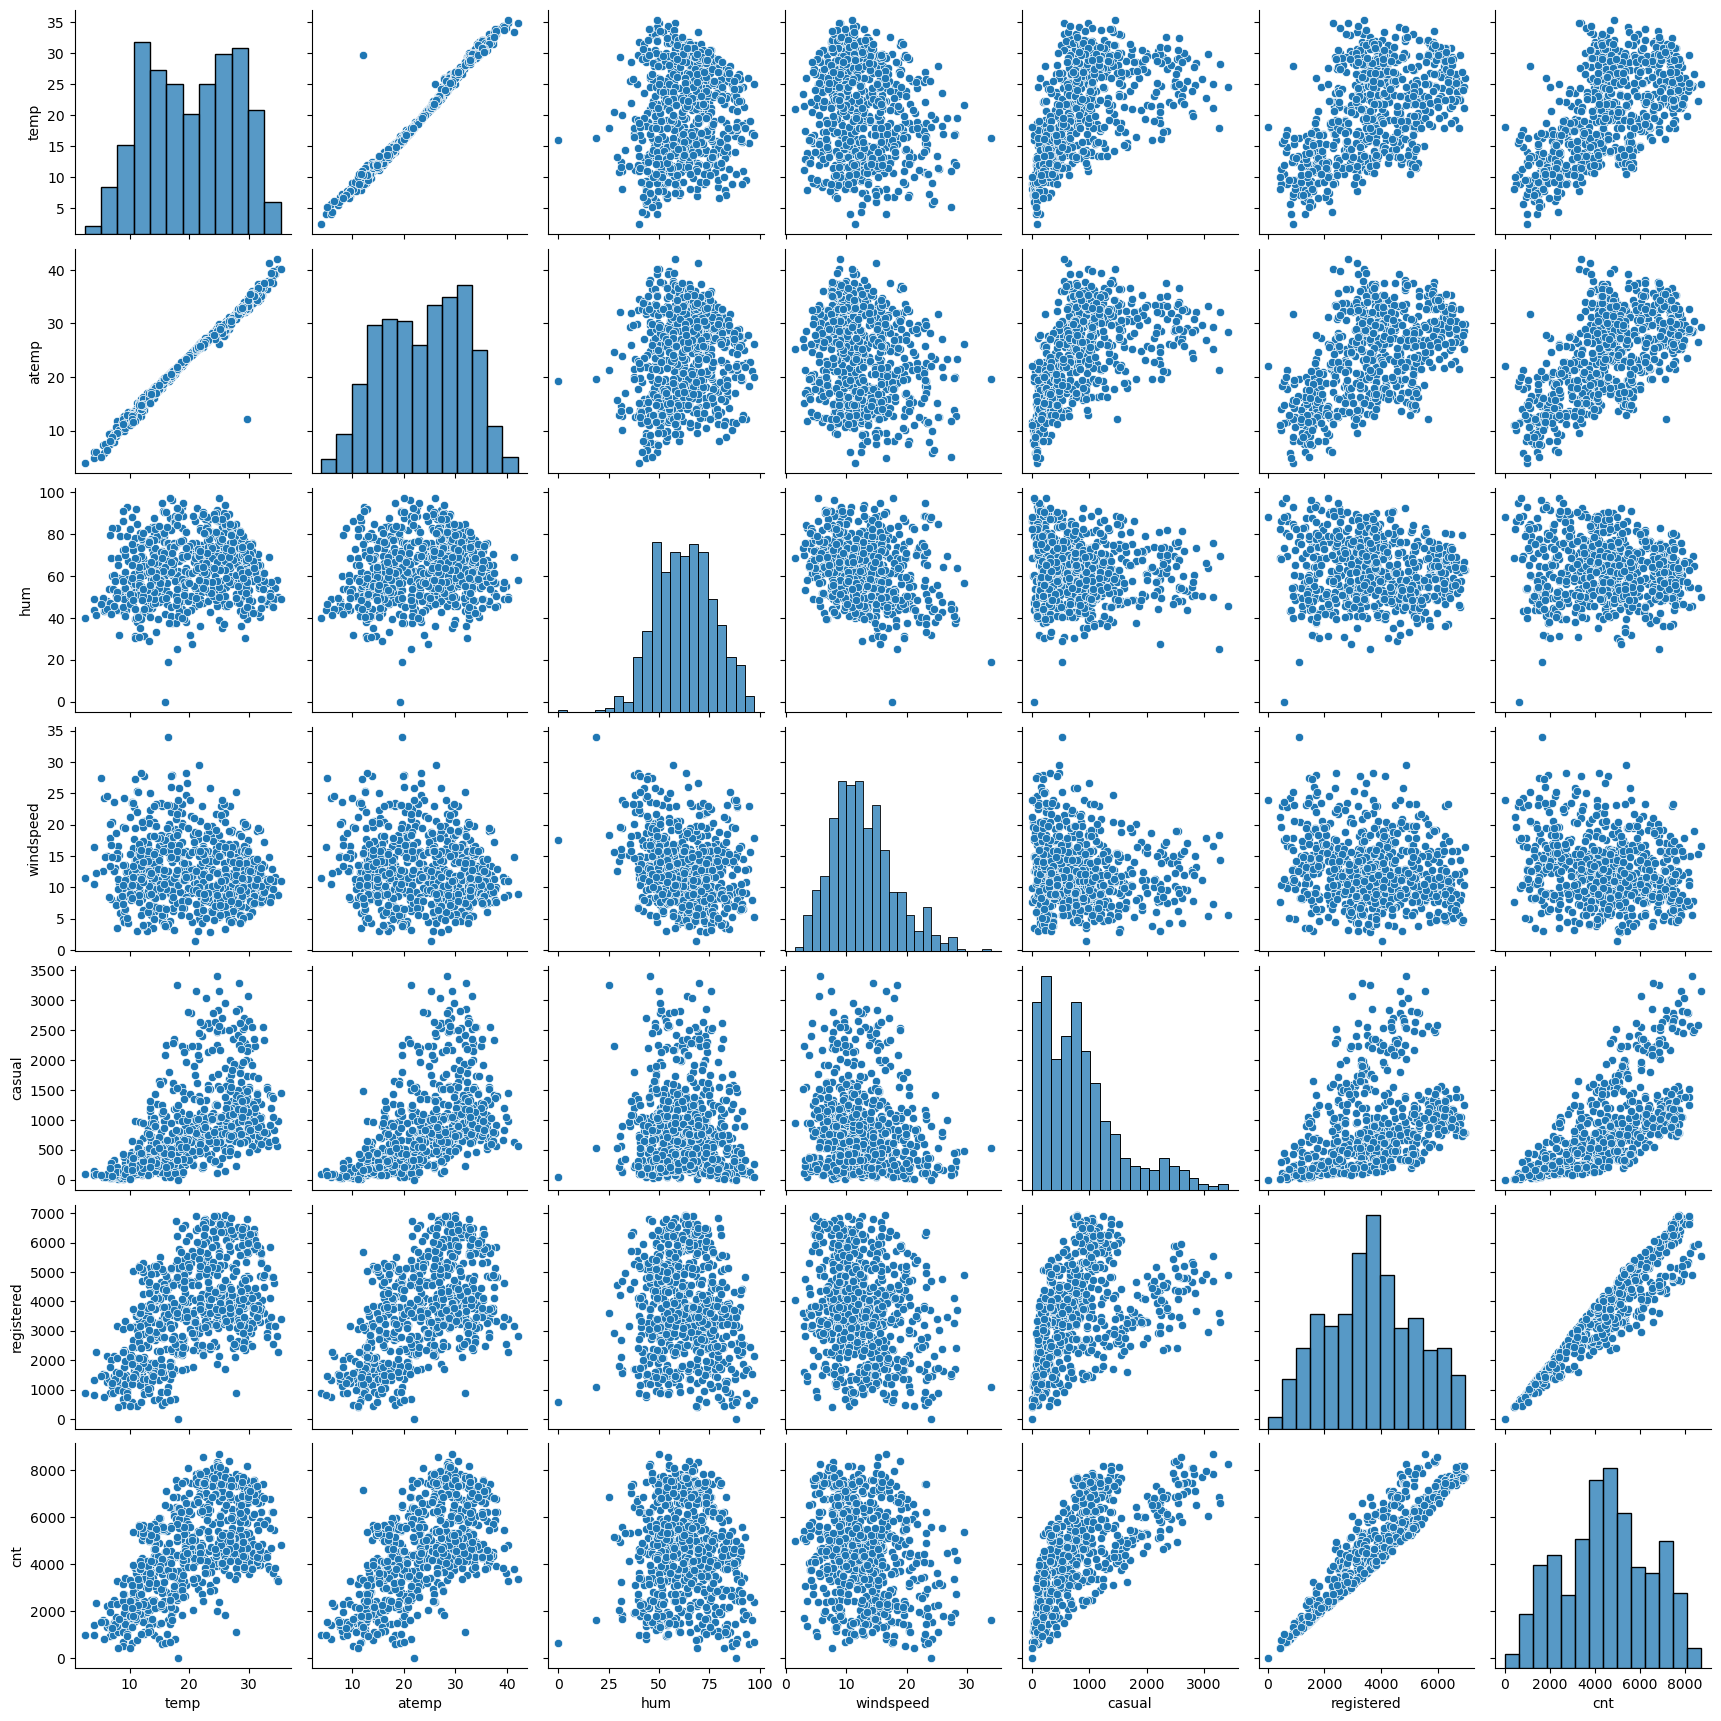

In [23]:
# check correlation of numerical columns with scatter plots
# ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

sns.pairplot(data=bike, vars=numCols)
plt.show()

In [24]:
# The temperature, casual and registered users have some level of correlation with cnt
# humidity and wind speed are not correlated as much with the target variable cnt

In [25]:
# correlation matrix among all numeric variables
# ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

numCorr = bike[numCols].corr()
numCorr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


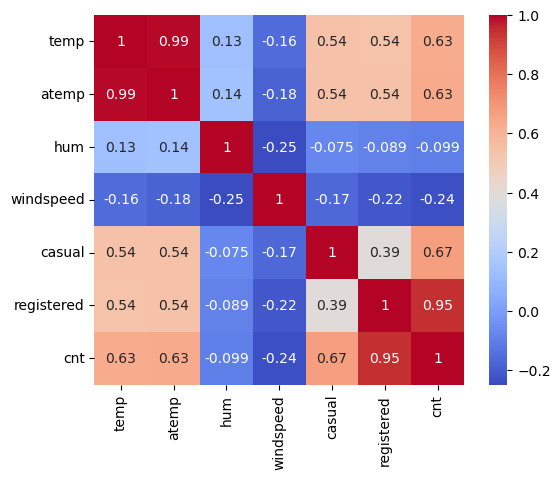

In [26]:
# draw a heatmap to see correlation among numerical columns in numbers
# ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

sns.heatmap(numCorr, annot=True, square=True, cmap='coolwarm')
plt.show()

In [27]:
# cnt variable is highly influenced by registered users
# cnt variable is significantly influenced by temperature, casual users
# cnt variable has very low influence of humidity and wind speed

In [28]:
# temp and atemp columns are highly correlated with each other.

# drop atemp column
bike.drop(labels='atemp', axis=1, inplace=True)

# adapt catCols list
numCols.remove('atemp')

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,No_Holiday,Mon,Weekday,Misty,14.110847,80.5833,10.749882,331,654,985
1,Spring,2018,Jan,No_Holiday,Tue,Weekday,Misty,14.902598,69.6087,16.652113,131,670,801
2,Spring,2018,Jan,No_Holiday,Wed,Weekday,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,Spring,2018,Jan,No_Holiday,Thu,Weekday,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,Spring,2018,Jan,No_Holiday,Fri,Weekday,Clear,9.305237,43.6957,12.522300,82,1518,1600


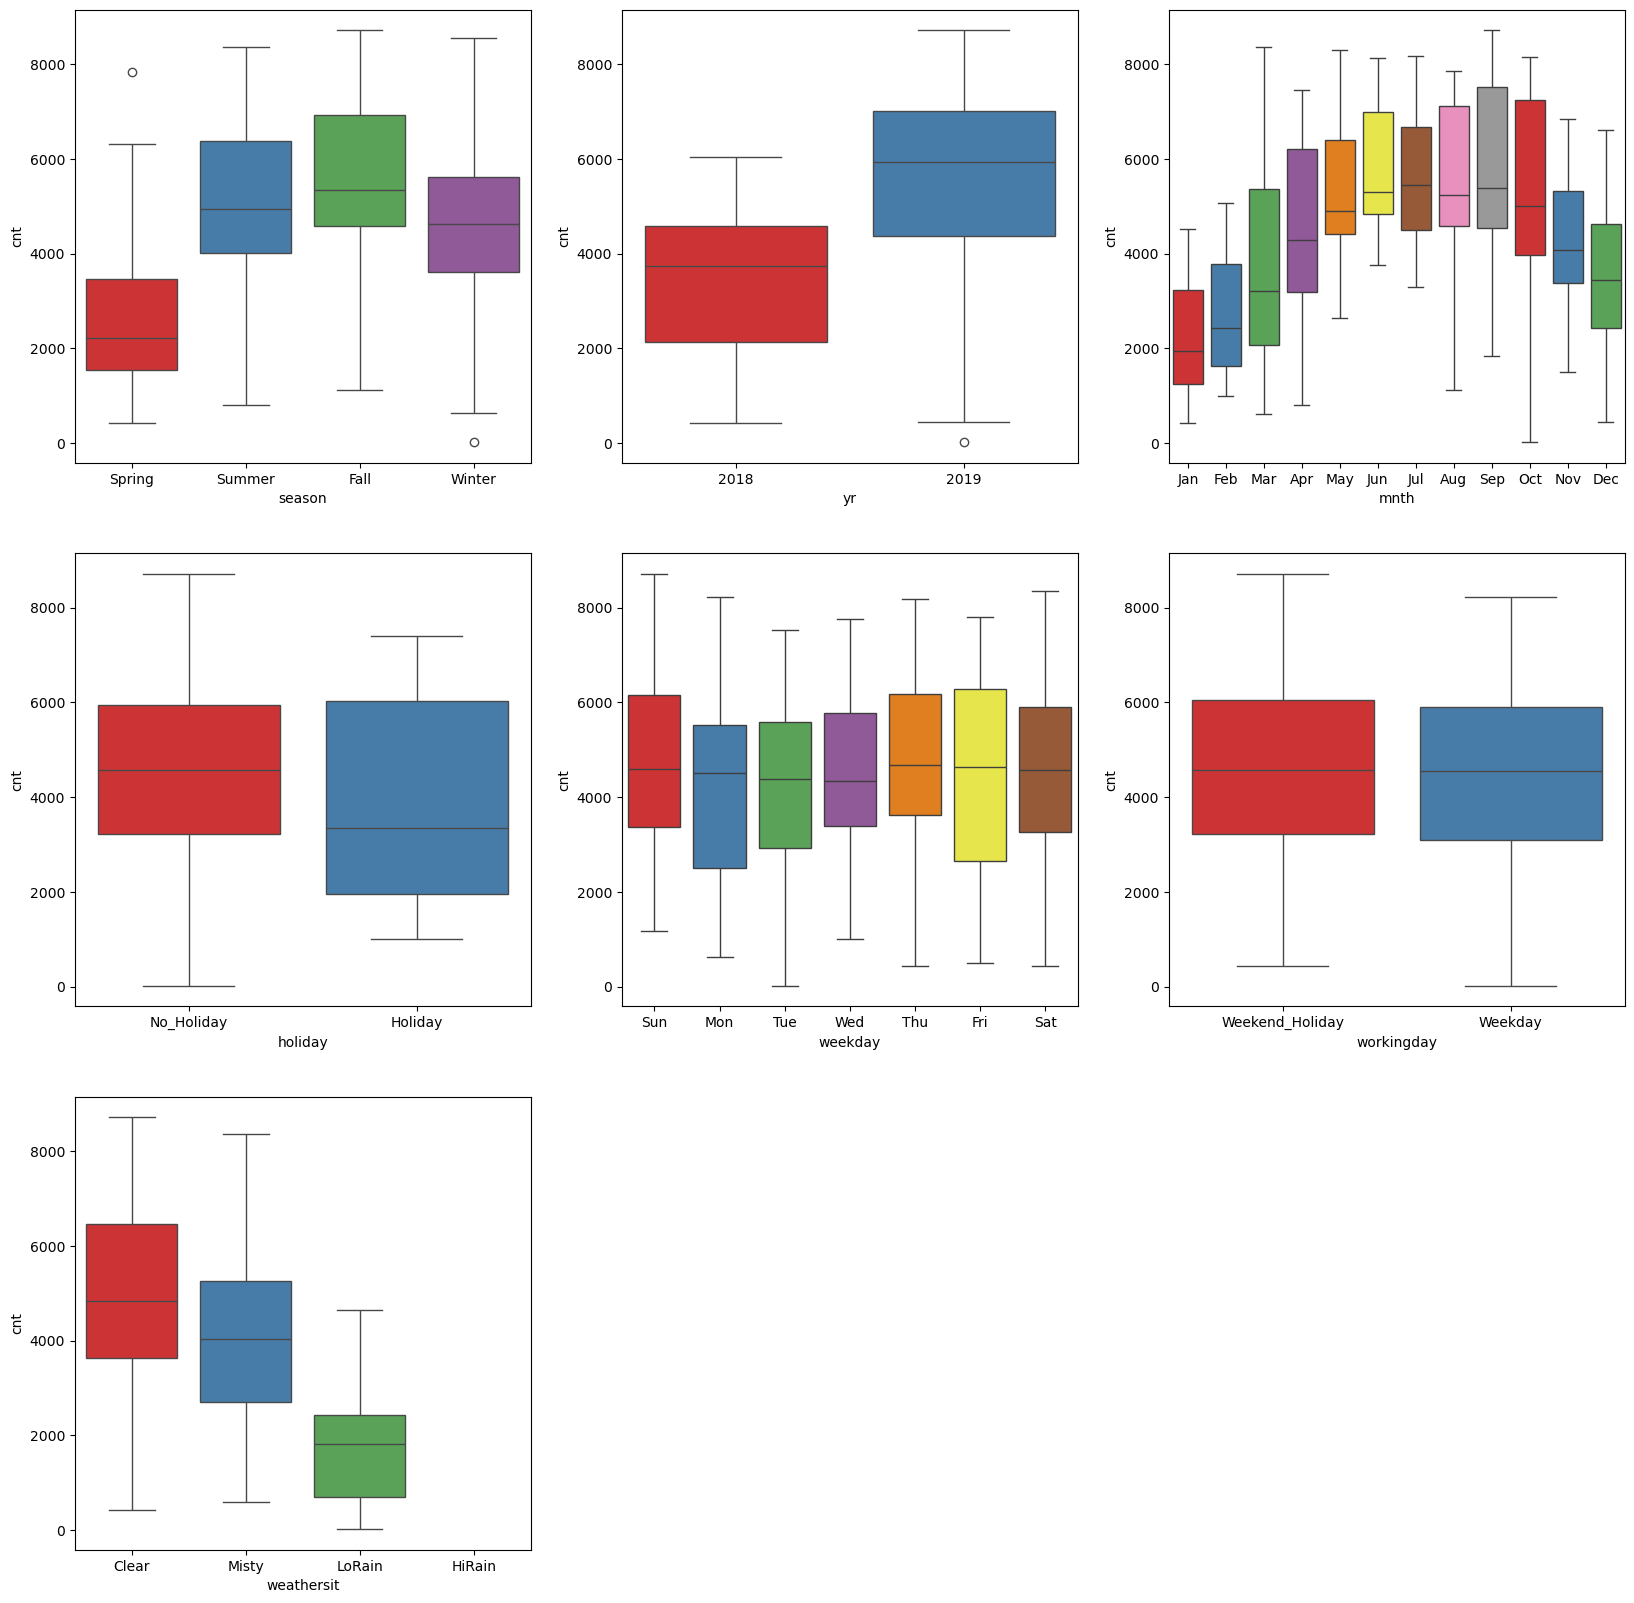

In [29]:
# box plot for categorical variables, to find any correlation with target variable cnt
# ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# seasonTypes = ['Spring', 'Summer', 'Fall', 'Winter']
# yearCategories = ['2018', '2019']
# monthCategories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# holidayCategories = ['No_Holiday', 'Holiday']
# weekdayCategories = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
# workingdayCategories = ['Weekend_Holiday', 'Weekday']
# weatherTypes = ['Clear', 'Misty', 'LoRain', 'HiRain']

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(data=bike, x='season', y='cnt', palette='Set1', order=seasonTypes)
plt.subplot(3,3,2)
sns.boxplot(data=bike, x='yr', y='cnt', palette='Set1', order=yearCategories)
plt.subplot(3,3,3)
sns.boxplot(data=bike, x='mnth', y='cnt', palette='Set1', order=monthCategories)
plt.subplot(3,3,4)
sns.boxplot(data=bike, x='holiday', y='cnt', palette='Set1', order=holidayCategories)
plt.subplot(3,3,5)
sns.boxplot(data=bike, x='weekday', y='cnt', palette='Set1', order=weekdayCategories)
plt.subplot(3,3,6)
sns.boxplot(data=bike, x='workingday', y='cnt', palette='Set1', order=workingdayCategories)
plt.subplot(3,3,7)
sns.boxplot(data=bike, x='weathersit', y='cnt', palette='Set1', order=weatherTypes)
plt.show()

## Data Preparation:

In [30]:
# create dummies for categorical variables
# for n levels in a categorical variable, n-1 dummy variables are created

In [31]:
bike = pd.get_dummies(bike, columns=catCols, drop_first=True, dtype=int)
bike.head()

,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend_Holiday,weathersit_LoRain,weathersit_Misty
0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,1,0,0,0,1
2,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,1,0,0,0
3,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,1,0,0,0,0,0
4,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0


## Model Building with training data:

In [32]:
# Perform train-test split
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size=0.8, random_state=100)

In [33]:
# check the dimensions of train and test sets
print(df_train.shape)
print(df_test.shape)

(584, 31)
(146, 31)


In [34]:
# Perform scaling: MinMax scaling
scaler = MinMaxScaler()

# fit_transform on X_train and transform on X_test
df_train[numCols] = scaler.fit_transform(df_train[numCols])

In [35]:
# check the scaled training dataframe
df_train.head()

,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend_Holiday,weathersit_LoRain,weathersit_Misty
367,0.113228,0.454701,0.695175,0.026516,0.307104,0.254717,1,...,0,1,0,0,0,0,0
648,0.468352,0.477458,0.299450,0.253581,0.969679,0.868385,0,...,0,0,0,0,0,0,0
44,0.443431,0.387290,0.807474,0.062786,0.243286,0.217556,1,...,0,0,0,1,0,0,0
705,0.326094,0.787463,0.189819,0.105760,0.669795,0.573631,0,...,0,0,0,0,1,0,1
379,0.133996,0.431945,0.449210,0.085949,0.289778,0.263346,1,...,0,0,1,0,0,0,0


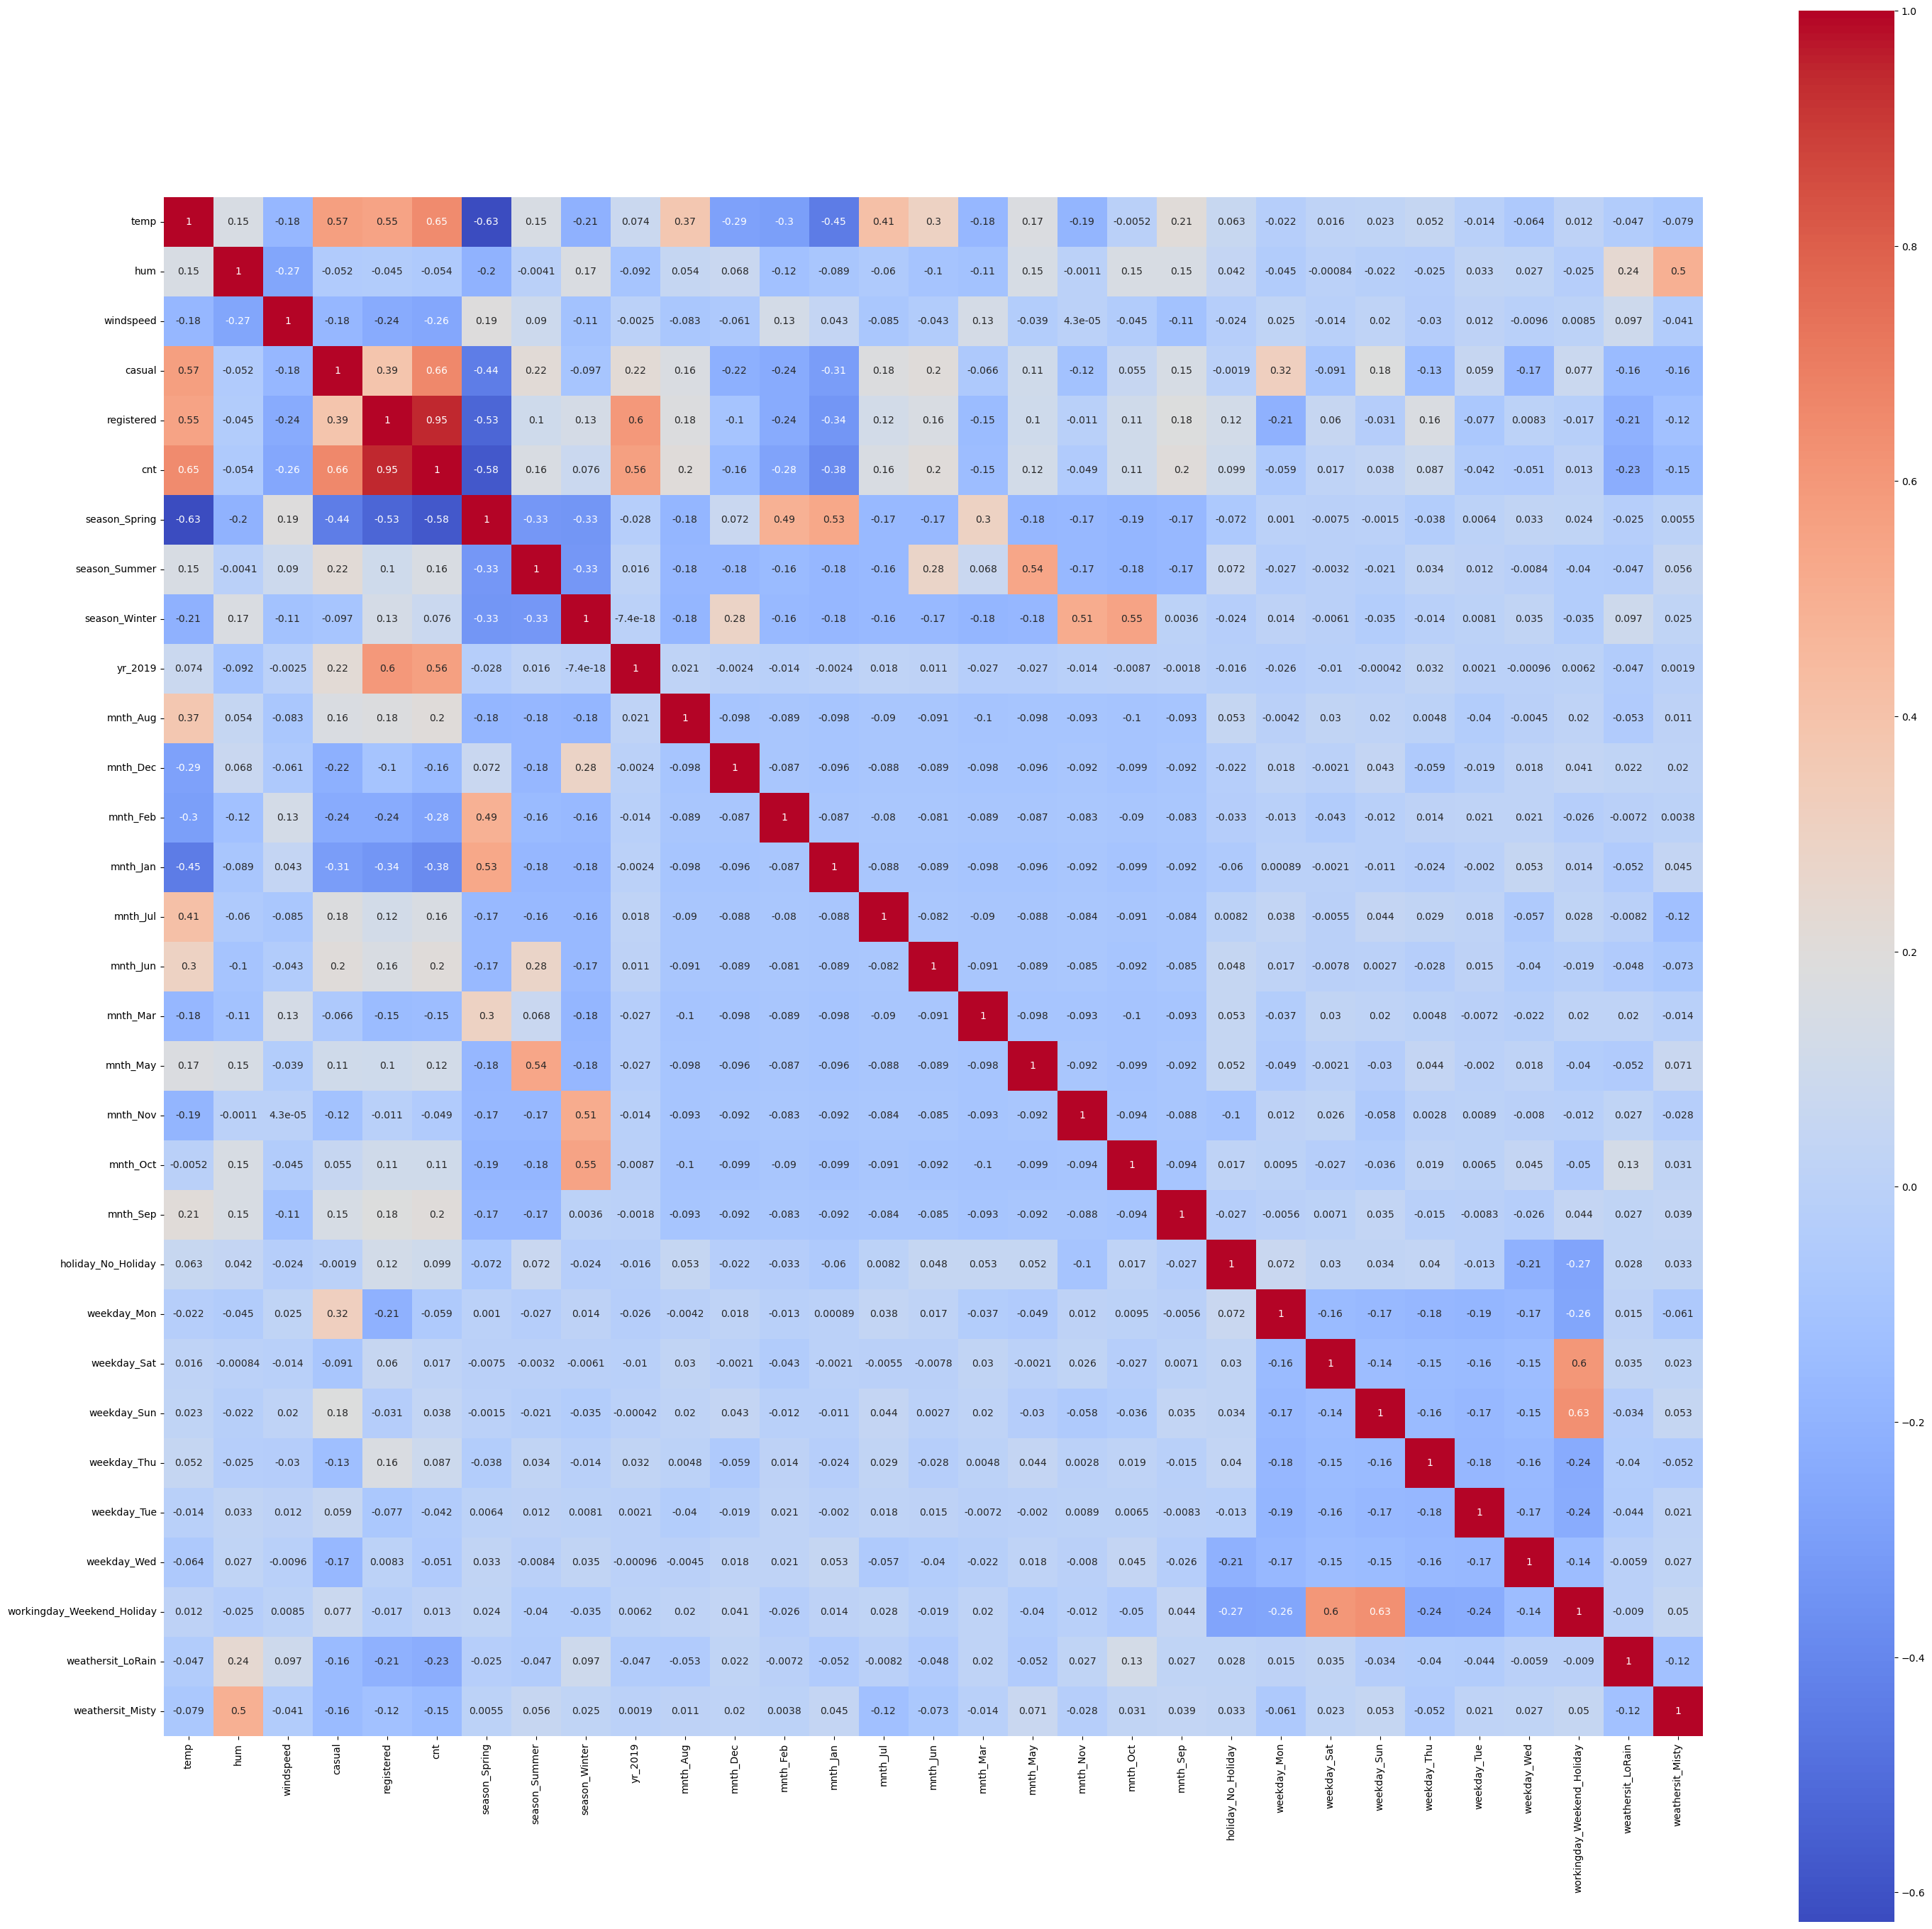

In [36]:
# check correlation among df_train variables now
plt.figure(figsize = (35, 35))
sns.heatmap(df_train.corr(), square=True, annot = True, cmap="coolwarm")
plt.show()

In [37]:
# temperature has high correlation with target variable cnt
# registered users, casual users have significant correlation with cnt

<Figure size 1000x1000 with 0 Axes>

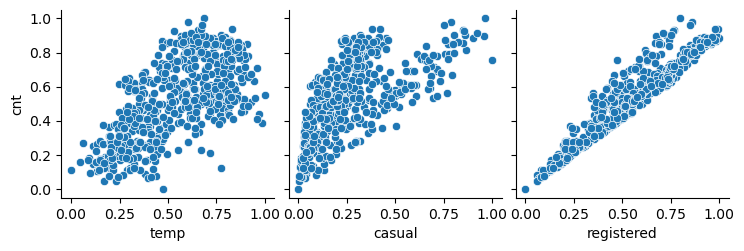

In [38]:
# draw scatter plots between cnt and temp/registered/casual
plt.figure(figsize=[10,10])
sns.pairplot(data=df_train, y_vars='cnt', x_vars=['temp', 'casual', 'registered'])
plt.show()

In [39]:
# drop casual and registered as their impact is captured from cnt variable
df_train.drop(labels=['casual','registered'], axis=1, inplace=True)

# adapt numCols
# numCols.remove('casual')
# numCols.remove('registered')
# numCols

In [40]:
df_train.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend_Holiday,weathersit_LoRain,weathersit_Misty
367,0.113228,0.454701,0.695175,0.254717,1,0,0,...,0,1,0,0,0,0,0
648,0.468352,0.477458,0.299450,0.868385,0,0,1,...,0,0,0,0,0,0,0
44,0.443431,0.387290,0.807474,0.217556,1,0,0,...,0,0,0,1,0,0,0
705,0.326094,0.787463,0.189819,0.573631,0,0,1,...,0,0,0,0,1,0,1
379,0.133996,0.431945,0.449210,0.263346,1,0,0,...,0,0,1,0,0,0,0


In [41]:
# create X and y sets for building the model
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
X_train.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend_Holiday,weathersit_LoRain,weathersit_Misty
367,0.113228,0.454701,0.695175,1,0,0,1,...,0,1,0,0,0,0,0
648,0.468352,0.477458,0.299450,0,0,1,1,...,0,0,0,0,0,0,0
44,0.443431,0.387290,0.807474,1,0,0,0,...,0,0,0,1,0,0,0
705,0.326094,0.787463,0.189819,0,0,1,1,...,0,0,0,0,1,0,1
379,0.133996,0.431945,0.449210,1,0,0,1,...,0,0,1,0,0,0,0


In [43]:
# convert features into array before model fitting to avoid any errors
# np.asarray(df_train)

#### model building with statsmodels package

In [44]:
# build a linear regression model using statsmodels package

# adding a constant as it is expected in statsmodels lib
X_train_lm = sm.add_constant(X_train)

# fitting the model with ordinary least squares method
lr = sm.OLS(y_train, X_train_lm).fit()

# check the coefficients of the model
lr.params

const                         0.202233
temp                          0.445787
hum                          -0.150467
windspeed                    -0.177237
season_Spring                -0.056273
season_Summer                 0.041766
season_Winter                 0.110214
yr_2019                       0.228034
mnth_Aug                      0.019379
mnth_Dec                     -0.050490
mnth_Feb                     -0.030372
mnth_Jan                     -0.058870
mnth_Jul                     -0.032899
mnth_Jun                      0.011467
mnth_Mar                      0.003544
mnth_May                      0.019118
mnth_Nov                     -0.049795
mnth_Oct                      0.012745
mnth_Sep                      0.079568
holiday_No_Holiday            0.132266
weekday_Mon                  -0.031657
weekday_Sat                  -0.045105
weekday_Sun                  -0.038259
weekday_Thu                   0.000074
weekday_Tue                  -0.028819
weekday_Wed              

In [45]:
# check the model summary from statsmodels package
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     116.6
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          5.34e-212
Time:                        22:05:57   Log-Likelihood:                 605.42
No. Observations:                 584   AIC:                            -1153.
Df Residuals:                     555   BIC:                            -1026.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2022      0.076      2.649      0.008       0.052       0.352
temp                           0.4458      0.043     10.391      0.000       0.362       0.530
hum                           -0.1505      0.037     -4.112      0.000      -0.222      -0.079
windspeed                     -0.1772      0.024     -7.363      0.000      -0.225      -0.130
season_Spring                 -0.0563      0.028     -2.038      0.042      -0.111      -0.002
season_Summer                  0.0418      0.024      1.715      0.087      -0.006       0.090
season_Winter                  0.1102      0.025      4.406      0.000       0.061       0.159
yr_2019                        0.2280      0.007     30.483      0.000       0.213       0.243
mnth_Aug                       0.0194      0.031      0.621      0.535      -0.042       0.081
mnth_Dec                      -0.0505      0.031     -1.621      0.106      -0.112       0.011
mnth_Feb                      -0.0304      0.031     -0.986      0.325      -0.091       0.030
mnth_Jan                      -0.0589      0.032     -1.854      0.064      -0.121       0.003
mnth_Jul                      -0.0329      0.032     -1.014      0.311      -0.097       0.031
mnth_Jun                       0.0115      0.023      0.506      0.613      -0.033       0.056
mnth_Mar                       0.0035      0.024      0.149      0.881      -0.043       0.050
mnth_May                       0.0191      0.019      0.983      0.326      -0.019       0.057
mnth_Nov                      -0.0498      0.034     -1.470      0.142      -0.116       0.017
mnth_Oct                       0.0127      0.033      0.388      0.698      -0.052       0.077
mnth_Sep                       0.0796      0.030      2.686      0.007       0.021       0.138
holiday_No_Holiday             0.1323      0.064      2.058      0.040       0.006       0.259
weekday_Mon                   -0.0317      0.013     -2.385      0.017      -0.058      -0.006
weekday_Sat                   -0.0451      0.069     -0.650      0.516      -0.181       0.091
weekday_Sun                   -0.0383      0.069     -0.553      0.581      -0.174       0.098
weekday_Thu                 7.449e-05      0.013      0.006      0.996      -0.026       0.027
weekday_Tue                   -0.0288      0.013     -2.186      0.029      -0.055      -0.003
weekday_Wed                   -0.0120      0.014     -0.865      0.388      -0.039       0.015
workingday_Weekend_Holiday     0.0482      0.069      0.701      0.484      -0.087       0.183
weathersit_LoRain             -0.2578      0.025    -10.186      0.000      -0.307      -0.208
weathersit_Misty              -0.0575      0.010     -5.876      0.000      -0.077      -0.038
===========================================

In [46]:
# The R-squared and Adjusted R-squared values (nearly 85%) indicate a good model.
# But there are a number of coefficients having high p-values

#### model building with sklearn package

In [47]:
# build a linear regression model using sklearn package
regModel = LinearRegression()

# fitting the model
regModel = regModel.fit(X_train, y_train)

In [48]:
# coefficients
regModel.coef_

array([ 4.45787353e-01, -1.50466995e-01, -1.77236961e-01, -5.62726791e-02,
        4.17659445e-02,  1.10214079e-01,  2.28034017e-01,  1.93788732e-02,
       -5.04897140e-02, -3.03720037e-02, -5.88695350e-02, -3.28985221e-02,
        1.14671608e-02,  3.54355208e-03,  1.91179426e-02, -4.97954169e-02,
        1.27450977e-02,  7.95683524e-02,  1.32266218e-01, -3.16570858e-02,
       -4.51050777e-02, -3.82591076e-02,  7.44937296e-05, -2.88189175e-02,
       -1.20051181e-02,  4.82390956e-02, -2.57750823e-01, -5.74990255e-02])

In [49]:
# intercept value
print(regModel.intercept_)

0.20223308171793225


In [50]:
coefficients = pd.DataFrame(data=regModel.coef_, index=X_train.columns, columns=['Coefficients'])
coefficients

,Coefficients
temp,0.445787
hum,-0.150467
windspeed,-0.177237
season_Spring,-0.056273
season_Summer,0.041766
season_Winter,0.110214
yr_2019,0.228034
mnth_Aug,0.019379
mnth_Dec,-0.050490
mnth_Feb,-0.030372


### Model building with RFE approach

In [51]:
# build a model

# go for 15 features
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

# fit the model for 15 features
rfe1.fit(X_train, y_train)

# Print the supported features with ranks
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True  True  True  True  True  True  True False  True False  True  True
 False False False  True False  True  True False False False False False
 False False  True  True]
[ 1  1  1  1  1  1  1 10  1  2  1  1 11 13  8  1 12  1  1  6  4  5 14  7
  9  3  1  1]


In [52]:
# evaluate the model

# select the supported 15 columns from rfe1 model
rfeCols = X_train.columns[rfe1.support_]
X_train_rfe1 = X_train[rfeCols]

# add constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_No_Holiday,weathersit_LoRain,weathersit_Misty
367,1.0,0.113228,0.454701,0.695175,1,0,0,...,1,0,0,0,1,0,0
648,1.0,0.468352,0.477458,0.299450,0,0,1,...,0,0,0,0,1,0,0
44,1.0,0.443431,0.387290,0.807474,1,0,0,...,0,0,0,0,1,0,0
705,1.0,0.326094,0.787463,0.189819,0,0,1,...,0,0,0,0,1,0,1
379,1.0,0.133996,0.431945,0.449210,1,0,0,...,1,0,0,0,1,0,0


In [53]:
# fit the model with supported 15 columns from rfe1 model
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          9.71e-222
Time:                        22:05:57   Log-Likelihood:                 594.34
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     568   BIC:                            -1087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2248      0

In [54]:
# This model also has approx 85% of R2-squared and adjusted r2-squared

In [55]:
# Check for multicollinearity with VIF (variance inflation factor)

# drop the const from the training data
rfe1_temp = X_train_rfe1.drop('const', axis=1)

# Create a dataframe for features and their VIF scores
vif = pd.DataFrame()
vif['Features'] = rfe1_temp.columns
# calculate VIF for all features
vif['VIF'] = [variance_inflation_factor(rfe1_temp.values, i) for i in range(rfe1_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# display the dataframe with features with their VIF scores
vif

,Features,VIF
1,hum,34.73
12,holiday_No_Holiday,25.50
0,temp,21.35
3,season_Spring,5.09
2,windspeed,4.93
5,season_Winter,4.13
4,season_Summer,3.05
14,weathersit_Misty,2.36
6,yr_2019,2.11
8,mnth_Jan,1.72


In [56]:
# The VIF score for quite a few variables is very high, expected is within 5
# we can try selecting a different number of variables for the RFE modeling

In [57]:
# build a model

# go for 10 features
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=10)

# fit the model for 10 features
rfe2.fit(X_train, y_train)

# Print the supported features with ranks
print(rfe2.support_)           
print(rfe2.ranking_) 

[ True  True  True  True False  True  True False False False False  True
 False False False False False  True  True False False False False False
 False False  True False]
[ 1  1  1  1  6  1  1 15  4  7  5  1 16 18 13  3 17  1  1 11  9 10 19 12
 14  8  1  2]


In [58]:
# evaluate the model

# select the supported 10 columns from rfe2 model
rfeCols = X_train.columns[rfe2.support_]
X_train_rfe2 = X_train[rfeCols]

# add constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,temp,hum,windspeed,season_Spring,season_Winter,yr_2019,mnth_Jul,mnth_Sep,holiday_No_Holiday,weathersit_LoRain
367,1.0,0.113228,0.454701,0.695175,1,0,1,0,0,1,0
648,1.0,0.468352,0.477458,0.299450,0,1,1,0,0,1,0
44,1.0,0.443431,0.387290,0.807474,1,0,0,0,0,1,0
705,1.0,0.326094,0.787463,0.189819,0,1,1,0,0,1,0
379,1.0,0.133996,0.431945,0.449210,1,0,1,0,0,1,0


In [59]:
# fit the model with supported 10 columns from rfe2 model
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     286.2
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          2.06e-215
Time:                        22:05:57   Log-Likelihood:                 565.04
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     573   BIC:                            -1060.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2721      0

In [60]:
# This model has a lesser i.e. 83% of R2-squared and adjusted r2-squared

In [61]:
# Check for multicollinearity with VIF (variance inflation factor)

# drop the const from the training data
rfe2_temp = X_train_rfe2.drop('const', axis=1)

# Create a dataframe for features and their VIF scores
vif = pd.DataFrame()
vif['Features'] = rfe2_temp.columns
# calculate VIF for all features
vif['VIF'] = [variance_inflation_factor(rfe2_temp.values, i) for i in range(rfe2_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# display the dataframe with features with their VIF scores
vif

,Features,VIF
8,holiday_No_Holiday,22.83
1,hum,20.18
0,temp,15.73
2,windspeed,4.54
3,season_Spring,2.78
5,yr_2019,2.07
4,season_Winter,2.04
6,mnth_Jul,1.40
7,mnth_Sep,1.20
9,weathersit_LoRain,1.11


In [62]:
# p-values are still showing the variables significant like last model rfe1.
# But VIF scores are high for quite a few variables is still very high, expected is within 5

In [63]:
# hum column can be removed as its VIF is seen high in both the models rfe1 and rfe2
X_train.drop(labels='hum', axis=1, inplace=True)
X_train

,temp,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend_Holiday,weathersit_LoRain,weathersit_Misty
367,0.113228,0.695175,1,0,0,1,0,...,0,1,0,0,0,0,0
648,0.468352,0.299450,0,0,1,1,0,...,0,0,0,0,0,0,0
44,0.443431,0.807474,1,0,0,0,0,...,0,0,0,1,0,0,0
705,0.326094,0.189819,0,0,1,1,0,...,0,0,0,0,1,0,1
379,0.133996,0.449210,1,0,0,1,0,...,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.187140,0,0,0,1,1,...,0,0,0,0,0,0,0
53,0.202618,0.111379,1,0,0,0,0,...,0,0,0,0,0,0,0
350,0.248216,0.431816,0,0,1,0,0,...,0,0,0,0,0,0,1
79,0.462664,0.529881,0,1,0,0,0,...,0,0,0,1,0,0,1


In [64]:
# build a model

# go for 8 features
lm = LinearRegression()
rfe3 = RFE(estimator=lm, n_features_to_select=8)

# fit the model for 8 features
rfe3.fit(X_train, y_train)

# Print the supported features with ranks
print(rfe3.support_)           
print(rfe3.ranking_) 

[ True  True  True False False  True False False False False  True False
 False False False False False  True False False False False False False
 False  True  True]
[ 1  1  1  8  2  1 15  4  7  5  1 14 18 16  3 19  6  1  9 12 13 20 10 17
 11  1  1]


In [65]:
# evaluate the model

# select the supported 8 columns from rfe3 model
rfeCols = X_train.columns[rfe3.support_]
X_train_rfe3 = X_train[rfeCols]

# add constant to the model
X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()

,const,temp,windspeed,season_Spring,yr_2019,mnth_Jul,holiday_No_Holiday,weathersit_LoRain,weathersit_Misty
367,1.0,0.113228,0.695175,1,1,0,1,0,0
648,1.0,0.468352,0.299450,0,1,0,1,0,0
44,1.0,0.443431,0.807474,1,0,0,1,0,0
705,1.0,0.326094,0.189819,0,1,0,1,0,1
379,1.0,0.133996,0.449210,1,1,0,1,0,0


In [66]:
# fit the model with supported 8 columns from rfe3 model
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     341.2
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          1.02e-212
Time:                        22:05:57   Log-Likelihood:                 552.73
No. Observations:                 584   AIC:                            -1087.
Df Residuals:                     575   BIC:                            -1048.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2098      0

In [67]:
# This model has even lesser i.e. 82% of R2-squared and adjusted r2-squared

In [68]:
# Check for multicollinearity with VIF (variance inflation factor)

# drop the const from the training data
rfe3_temp = X_train_rfe3.drop('const', axis=1)

# Create a dataframe for features and their VIF scores
vif = pd.DataFrame()
vif['Features'] = rfe3_temp.columns
# calculate VIF for all features
vif['VIF'] = [variance_inflation_factor(rfe3_temp.values, i) for i in range(rfe3_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# display the dataframe with features with their VIF scores
vif

,Features,VIF
5,holiday_No_Holiday,13.94
0,temp,10.25
1,windspeed,4.48
3,yr_2019,2.05
2,season_Spring,1.96
7,weathersit_Misty,1.56
4,mnth_Jul,1.32
6,weathersit_LoRain,1.06


In [69]:
# p-values are still showing the variables significant like last model rfe2.
# But VIF scores are high for quite a few variables is still very high, expected is within 5

In [70]:
# build a model

# go for 7 features
lm = LinearRegression()
rfe4 = RFE(estimator=lm, n_features_to_select=7)

# fit the model for 7 features
rfe4.fit(X_train, y_train)

# Print the supported features with ranks
print(rfe4.support_)           
print(rfe4.ranking_) 

[ True  True  True False False  True False False False False  True False
 False False False False False  True False False False False False False
 False  True False]
[ 1  1  1  9  3  1 16  5  8  6  1 15 19 17  4 20  7  1 10 13 14 21 11 18
 12  1  2]


In [71]:
# evaluate the model

# select the supported 7 columns from rfe4 model
rfeCols = X_train.columns[rfe4.support_]
X_train_rfe4 = X_train[rfeCols]

# add constant to the model
X_train_rfe4 = sm.add_constant(X_train_rfe4)
X_train_rfe4.head()

,const,temp,windspeed,season_Spring,yr_2019,mnth_Jul,holiday_No_Holiday,weathersit_LoRain
367,1.0,0.113228,0.695175,1,1,0,1,0
648,1.0,0.468352,0.299450,0,1,0,1,0
44,1.0,0.443431,0.807474,1,0,0,1,0
705,1.0,0.326094,0.189819,0,1,0,1,0
379,1.0,0.133996,0.449210,1,1,0,1,0


In [72]:
# fit the model with supported 7 columns from rfe4 model
lm4 = sm.OLS(y_train, X_train_rfe4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     328.9
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          1.42e-196
Time:                        22:05:57   Log-Likelihood:                 511.90
No. Observations:                 584   AIC:                            -1008.
Df Residuals:                     576   BIC:                            -972.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1773      0

In [73]:
# This model has even lesser i.e. 79% of R2-squared and adjusted r2-squared

In [74]:
# Check for multicollinearity with VIF (variance inflation factor)

# drop the const from the training data
rfe4_temp = X_train_rfe4.drop('const', axis=1)

# Create a dataframe for features and their VIF scores
vif = pd.DataFrame()
vif['Features'] = rfe4_temp.columns
# calculate VIF for all features
vif['VIF'] = [variance_inflation_factor(rfe4_temp.values, i) for i in range(rfe4_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# display the dataframe with features with their VIF scores
vif

,Features,VIF
5,holiday_No_Holiday,13.29
0,temp,10.25
1,windspeed,4.48
3,yr_2019,2.05
2,season_Spring,1.96
4,mnth_Jul,1.30
6,weathersit_LoRain,1.05


In [75]:
# p-values are fine, but VIF scores are high again for a few variables

In [76]:
# holiday_No_Holiday column can be removed as its VIF is seen high in previous models too
X_train.drop(labels='holiday_No_Holiday', axis=1, inplace=True)
X_train

,temp,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend_Holiday,weathersit_LoRain,weathersit_Misty
367,0.113228,0.695175,1,0,0,1,0,...,0,1,0,0,0,0,0
648,0.468352,0.299450,0,0,1,1,0,...,0,0,0,0,0,0,0
44,0.443431,0.807474,1,0,0,0,0,...,0,0,0,1,0,0,0
705,0.326094,0.189819,0,0,1,1,0,...,0,0,0,0,1,0,1
379,0.133996,0.449210,1,0,0,1,0,...,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.187140,0,0,0,1,1,...,0,0,0,0,0,0,0
53,0.202618,0.111379,1,0,0,0,0,...,0,0,0,0,0,0,0
350,0.248216,0.431816,0,0,1,0,0,...,0,0,0,0,0,0,1
79,0.462664,0.529881,0,1,0,0,0,...,0,0,0,1,0,0,1


In [77]:
# build a model

# go for 6 features
lm = LinearRegression()
rfe5 = RFE(estimator=lm, n_features_to_select=6)

# fit the model for 6 features
rfe5.fit(X_train, y_train)

# Print the supported features with ranks
print(rfe5.support_)           
print(rfe5.ranking_) 

[ True  True  True False False  True False False False False False False
 False False False False False False False  True False False False False
  True False]
[ 1  1  1 12  6  1 16  8 11  9  4 15 19 17  7 20 10 13  2  1 21 14 18  3
  1  5]


In [78]:
# evaluate the model

# select the supported 6 columns from rfe4 model
rfeCols = X_train.columns[rfe5.support_]
X_train_rfe5 = X_train[rfeCols]

# add constant to the model
X_train_rfe5 = sm.add_constant(X_train_rfe5)
X_train_rfe5.head()

,const,temp,windspeed,season_Spring,yr_2019,weekday_Sun,weathersit_LoRain
367,1.0,0.113228,0.695175,1,1,0,0
648,1.0,0.468352,0.299450,0,1,0,0
44,1.0,0.443431,0.807474,1,0,0,0
705,1.0,0.326094,0.189819,0,1,0,0
379,1.0,0.133996,0.449210,1,1,0,0


In [79]:
# fit the model with supported 7 columns from rfe4 model
lm5 = sm.OLS(y_train, X_train_rfe5).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     363.2
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          3.15e-192
Time:                        22:05:57   Log-Likelihood:                 498.70
No. Observations:                 584   AIC:                            -983.4
Df Residuals:                     577   BIC:                            -952.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2778      0.01

In [80]:
# This model has even lesser i.e. 79% of R2-squared and adjusted r2-squared

In [81]:
# Check for multicollinearity with VIF (variance inflation factor)

# drop the const from the training data
rfe5_temp = X_train_rfe5.drop('const', axis=1)

# Create a dataframe for features and their VIF scores
vif = pd.DataFrame()
vif['Features'] = rfe5_temp.columns
# calculate VIF for all features
vif['VIF'] = [variance_inflation_factor(rfe5_temp.values, i) for i in range(rfe5_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# display the dataframe with features with their VIF scores
vif

,Features,VIF
1,windspeed,3.78
0,temp,3.46
3,yr_2019,2.01
2,season_Spring,1.54
4,weekday_Sun,1.15
5,weathersit_LoRain,1.04


In [82]:
# weekday_Sun column can be removed as its p-value is seen high
X_train.drop(labels='weekday_Sun', axis=1, inplace=True)
X_train

,temp,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend_Holiday,weathersit_LoRain,weathersit_Misty
367,0.113228,0.695175,1,0,0,1,0,...,0,1,0,0,0,0,0
648,0.468352,0.299450,0,0,1,1,0,...,0,0,0,0,0,0,0
44,0.443431,0.807474,1,0,0,0,0,...,0,0,0,1,0,0,0
705,0.326094,0.189819,0,0,1,1,0,...,1,0,0,0,1,0,1
379,0.133996,0.449210,1,0,0,1,0,...,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.187140,0,0,0,1,1,...,0,0,0,0,0,0,0
53,0.202618,0.111379,1,0,0,0,0,...,0,0,0,0,0,0,0
350,0.248216,0.431816,0,0,1,0,0,...,0,0,0,0,0,0,1
79,0.462664,0.529881,0,1,0,0,0,...,0,0,0,1,0,0,1


In [83]:
# build a model

# go for 6 features
lm = LinearRegression()
rfe6 = RFE(estimator=lm, n_features_to_select=6)

# fit the model for 6 features
rfe6.fit(X_train, y_train)

# Print the supported features with ranks
print(rfe6.support_)           
print(rfe6.ranking_) 

[ True  True  True False False  True False False False False  True False
 False False False False False False False False False False False  True
 False]
[ 1  1  1  9  3  1 13  5  7  6  1 14 20 15  4 18  8 11 19 16 10 12 17  1
  2]


In [84]:
# evaluate the model

# select the supported 6 columns from rfe4 model
rfeCols = X_train.columns[rfe6.support_]
X_train_rfe6 = X_train[rfeCols]

# add constant to the model
X_train_rfe6 = sm.add_constant(X_train_rfe6)
X_train_rfe6.head()

,const,temp,windspeed,season_Spring,yr_2019,mnth_Jul,weathersit_LoRain
367,1.0,0.113228,0.695175,1,1,0,0
648,1.0,0.468352,0.299450,0,1,0,0
44,1.0,0.443431,0.807474,1,0,0,0
705,1.0,0.326094,0.189819,0,1,0,0
379,1.0,0.133996,0.449210,1,1,0,0


In [85]:
# fit the model with supported 7 columns from rfe4 model
lm6 = sm.OLS(y_train, X_train_rfe6).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     375.3
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          1.77e-195
Time:                        22:05:57   Log-Likelihood:                 506.29
No. Observations:                 584   AIC:                            -998.6
Df Residuals:                     577   BIC:                            -968.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2608      0.01

In [86]:
# This model has 79% of R2-squared and adjusted r2-squared

In [87]:
# Check for multicollinearity with VIF (variance inflation factor)

# drop the const from the training data
rfe6_temp = X_train_rfe6.drop('const', axis=1)

# Create a dataframe for features and their VIF scores
vif = pd.DataFrame()
vif['Features'] = rfe6_temp.columns
# calculate VIF for all features
vif['VIF'] = [variance_inflation_factor(rfe6_temp.values, i) for i in range(rfe6_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# display the dataframe with features with their VIF scores
vif

,Features,VIF
0,temp,3.97
1,windspeed,3.86
3,yr_2019,2.01
2,season_Spring,1.54
4,mnth_Jul,1.25
5,weathersit_LoRain,1.04


In [88]:
# Now we have both p-values and VIF scores in acceptable ranges

In [89]:
# The original model with all 28 variables had R-squared and Adjusted R-squared 84-85%
# But the model here with only 6 predictor variables has R-squared and Adjusted r_squared a little less than 80%
# It can be conclouded that the present model has a very good selection of predictor variables.

## Residual Analysis:

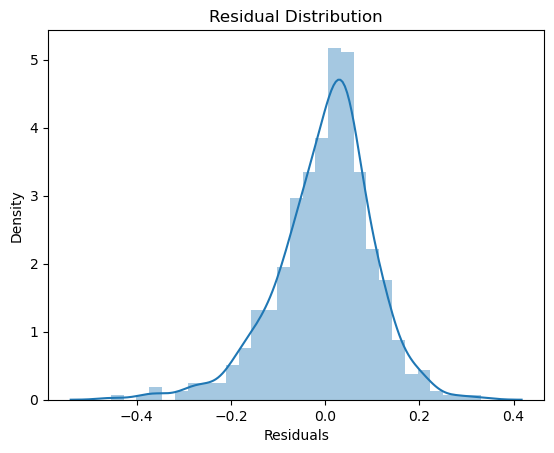

In [90]:
# prediction on the training set
y_train_pred = lm6.predict(X_train_rfe6)

# check the normal distribution of error terms with distplot
sns.distplot((y_train - y_train_pred))
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.show()

In [91]:
# Error terms seem to be quite normally distributed

## Predictions on test data:

In [92]:
numCols

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [93]:
df_test[numCols] = scaler.transform(df_test[numCols])

In [94]:
# create X and y sets from the test dataframe
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [96]:
# take the finalized columns in the latest model into test data
X_test_rfe6 = X_test[rfe6_temp.columns]

In [108]:
# add constant to the test set
X_test_rfe6 = sm.add_constant(X_test_rfe6)

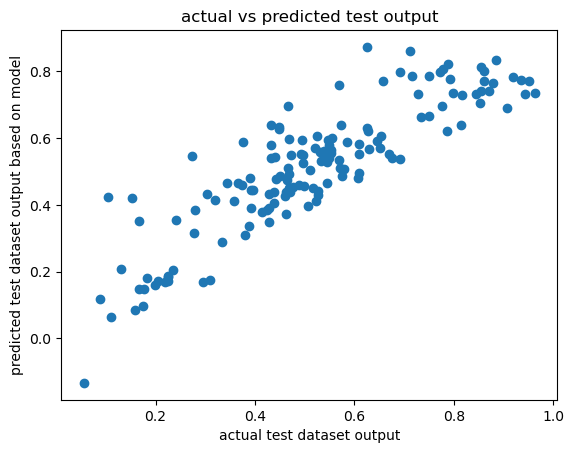

In [120]:
# prediction on the test set
y_test_pred = lm6.predict(X_test_rfe6)

# check the predicted output w.r.t actual output
plt.scatter(y_test, y_test_pred)
plt.title('actual vs predicted test output')
plt.xlabel('actual test dataset output')
plt.ylabel('predicted test dataset output based on model')
plt.show()

In [121]:
# The test data actual and predicted outputs are going quite well with each other.

In [122]:
# check r-squared
r2_score(y_test, y_test_pred)

0.7611406901294309

In [128]:
# R-squared on training data was ~79% and 
# R-squared on test data is ~76%

In [129]:
# Other metrics for 
MAE = mean_absolute_error(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)

print('MAE : Mean Absolute Error:            ', MAE)
print('MSE : Mean Squared Error:             ', MSE)
print('RMSE: Root Mean Squared Error:        ', RMSE)
print('MAPE: Mean Absolute Percentage Error: ', MAPE)

MAE : Mean Absolute Error:             0.08071917445125203
MSE : Mean Squared Error:              0.010738033908217388
RMSE: Root Mean Squared Error:         0.10362448508058984
MAPE: Mean Absolute Percentage Error:  0.22462174031927162


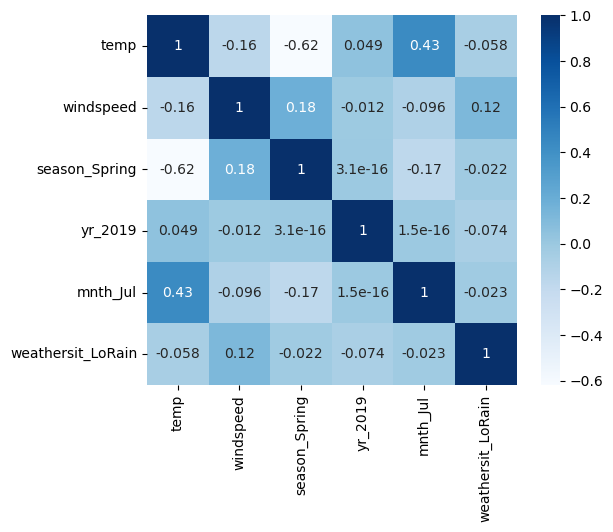

In [130]:
# check correlations among finall predictor variable concluded from the latest model

# plt.figure(figsize=(8,5))

sns.heatmap(bike[rfe6_temp.columns].corr(), cmap="Blues", annot=True, square=True)
plt.show()

In [131]:
# The final model has quite acceptable correlations among the predictor variables.